# <span id="toc">  Esercitazione 7 - Monte Carlo - NVT </span>

[  Ensemble canonico NVT ](#ex-7.0)

[  7.1 - Tail corrections ](#ex-7.1)

&nbsp;&nbsp;  [  Equilibrazione  ](#ex-7.1.0)

[  7.2 - Autocorrelazione ed incertezze statistiche  ](#ex-7.2)

[  7.3 - Radial Distribution Function $g(r)$  ](#ex-7.3)

[  7.4 - Simulazioni con modello di Lennard-Jones  ](#ex-7.4)


### <span id="ex-7.0">  Ensemble canonico - NVT </span>[^](#toc)

In questa esercitazione devo eseguire simulazioni su un **ensemble canonico**, in stato solido, liquido e gassoso, a rispettive diverse temperature. 

Dal punto di vista macroscopico questo ensemble rappresenta i possibili stati di un sistema la cui **temperatura $T$ è fissata**, il quale perciò deve essere a contatto con un bagno termico di capacità infinita (a temperatura $T$), col quale può **scambiare energia**: da qui il nome NVT, a indicare che numero di particelle, volume e temperatura sono costanti. 

Dal punto di vista microscopico l'ensemble canonico è invece definito dalla probabilità associata a ciascun microstato:
$$
P=\frac{e^{-E/(k_BT)}}{Z} \qquad \qquad \text{con} \quad Z= e^{-F/(k_BT)}
$$


## <span id="ex-7.1">  Esercizio 7.1 </span>[^](#toc)

Nell'[esercitazione 4](#https://github.com/martinozanetti/LSN-Martino-Zanetti/blob/master/04-ok/my-04.ipynb), parlando di raggio di cutoff, ho accennato alla necessità di correggere l'approssimazione fatta tramite *tail corrections*.

Si può dimostrare che per un potenziale di Lennard-Jones queste correzioni valgono rispettivamente:
$$
\frac{\langle U \rangle _{tail}}{N}
    = \frac{8\pi\rho\epsilon}{9 r_c^9} 
      - \frac{8\pi\rho\epsilon}{3 r_c^3}
\qquad \qquad
\frac{\langle W \rangle _{tail}}{3N\epsilon}
    = 32\pi\rho
        \left[
            \frac{1}{9 r_c^9} 
          - \frac{1}{6 r_c^3}
        \right]
$$
dove $\rho$ e $r_c$ sono in unità di $\sigma_{LJ}$. Come nell'esercitazione 4, usiamo $\sigma=\epsilon = 1$.

In questa esercitazione ho incluso queste correzioni per le stime di energia potenziale e pressione. 

### <span id="ex-7.1.0">  Equilibrazione </span>[^](#toc)

Iniziando dall configurazione a cristallo fcc, equilibrio con le temperature corrette.

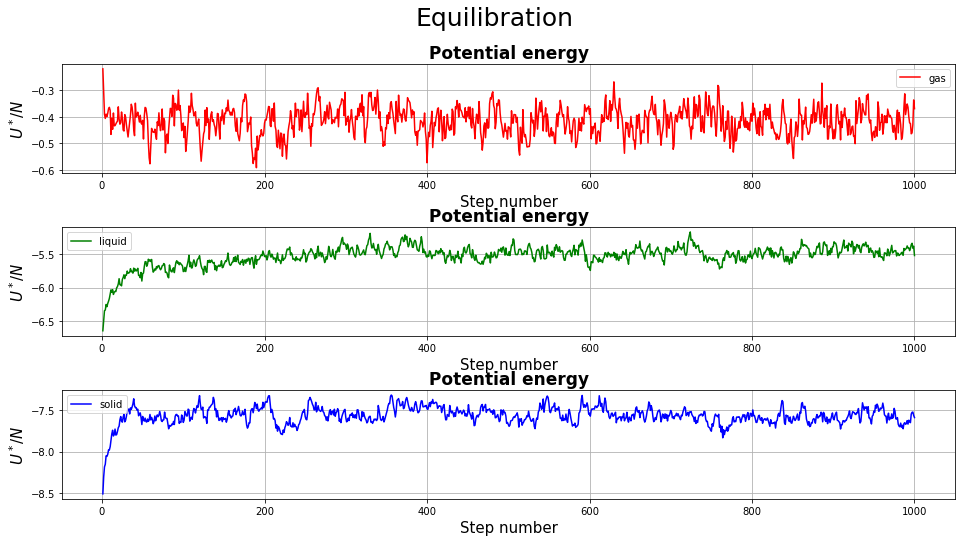

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

npart = 108

N = 1000
x = np.arange(N)+1    # uso l'ordinamento da 1 a N

phase = ["gas", "liquid", "solid"]
phase_z = ["gas-zoom", "liquid-zoom", "solid-zoom"]
colors = ["r","g","b"]
k=0

plt.figure(figsize=(16,8))
plt.suptitle("Equilibration", fontsize = 25)

for i in range(0,3):
    plt.subplot(3,1,i+1)
    U = np.loadtxt("ex7-MDNVE_MCNVT/eq/"+phase[i]+"/output_epot.dat", usecols=(1), delimiter=' ', unpack='true')
    plt.plot(x, U, marker='', label=phase[i], color = colors[i])
    plt.title('Potential energy', fontsize = 17, fontweight = "bold")
    plt.ylabel('$U^*/N$', fontsize = 15)
    plt.xlabel('Step number', fontsize = 15)
    plt.grid(True)
    plt.legend()
    plt.subplots_adjust(hspace=0.5)


plt.show()



## <span id="ex-7.2">  Esercizio 7.2 - Autocorrelazione ed incertezze statistiche </span>[^](#toc)

Use the MD/MC code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

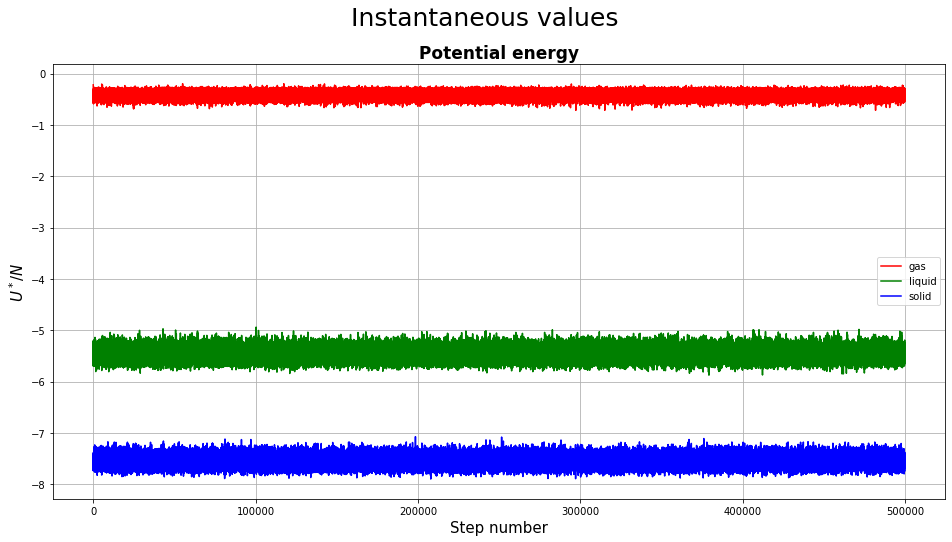

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

npart = 108

N = 500000
x = np.arange(N)+1    # uso l'ordinamento da 1 a N

phase = ["gas", "liquid", "solid"]
phase_z = ["gas-zoom", "liquid-zoom", "solid-zoom"]
colors = ["r","g","b"]

U_g = U_l = U_s = []
U = [U_g, U_l, U_s]

plt.figure(figsize=(16,8))
plt.suptitle("Instantaneous values", fontsize = 25)

for i in range(0,3):
    U[i] = np.loadtxt("ex7-MDNVE_MCNVT/SAVED/"+phase[i]+"/output_epot.dat", usecols=(1), delimiter=' ', unpack='true')
    plt.plot(x, U[i], marker='', label=phase[i], color = colors[i])
    plt.title('Potential energy', fontsize = 17, fontweight = "bold")
    plt.ylabel('$U^*/N$', fontsize = 15)
    plt.xlabel('Step number', fontsize = 15)
    plt.grid(True)
    plt.legend()
    plt.subplots_adjust(hspace=0.5)   
    
plt.show()

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.

Ci aspettiamo una specie di esponenziale che in tipo 200 passi è decaduto. La stima di tau si puo fare con un fit.


In [3]:
tmax = N
taumax = 200

plt.figure(figsize=(8,6))

for i in range(0,3):

    chi = []

    print("\ntau (nth of "+str(taumax)+") - "+phase[i]+": ")
    for tau in range(taumax):
        s1=0
        s2=0
        s3=0
        s4=0
        s5=0

        # autocorrelation: see lect.6, p.31
        for tp in range(tmax-tau):
            s1 += U[i][tp]*U[i][tp+tau]
            s2 += U[i][tp]
            s3 += U[i][tp+tau]

        for tp in range(tmax):
            s4 += U[i][tp]*U[i][tp]
            s5 += U[i][tp]

        fatt = 1/(tmax-tau)
        fatt2 = 1/tmax

        num = fatt*s1-fatt*s2*fatt*s3
        den = fatt2*s4 - (fatt2*s5)*(fatt2*s5)

        chi.append(num/den)

        if tau%10==0:
            print(tau, end= ", ")

    plt.plot(chi, color = colors[i], label = phase[i])
    plt.xlabel("Monte carlo time (~ distance between different measurments)")
    plt.ylabel("Autocorrelation")
    plt.legend()
    plt.grid()

plt.title("Autocorrelation vs time distance", fontsize = 18, fontweight = "bold")
plt.show

# take in count about 15 minutes to run(!)



tau (nth of 200) - gas: 
0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 


2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

(v. slide 36, 37, 38, 39, lez.6)

Ma in che senso "usa gli stessi dati per fare questa cosa"? \\\
Dall'eq per sigma a p. 39 a me pare che sia necessario stimare le medie g_i con diverse impostazioni di N e M. A meno di non fare una simulazione con blocchi lunghi 1 e quindi avere i dati "puri". In questo modo potrei fare con python le medie a blocchi con diverse lunghezze e cos' rispondere a questo punto... let's do it... ah è già così! (avendo settato nstep = 1 nell'ultima riga dell'inputfile)

Vogliamo far vedere che l'incertezza dipende dai blocchi: in particolare blocchi più piccoli della correlazione causano diversa incertezza statistica. Fare un plot di questa cosa. Tipicamente questo studio si fa per capire da che punto in poi l'incertezza statistica è calcolata in modo accurato: blocchi piccoli sottostimano l'incertezza statistica; quando essa satura, so che il blocco è abbastanza grande da aver "annullato" le correlazioni.


L (of 5000) - gas: 
500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 
L (of 5000) - liquid: 
500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 
L (of 5000) - solid: 
500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 

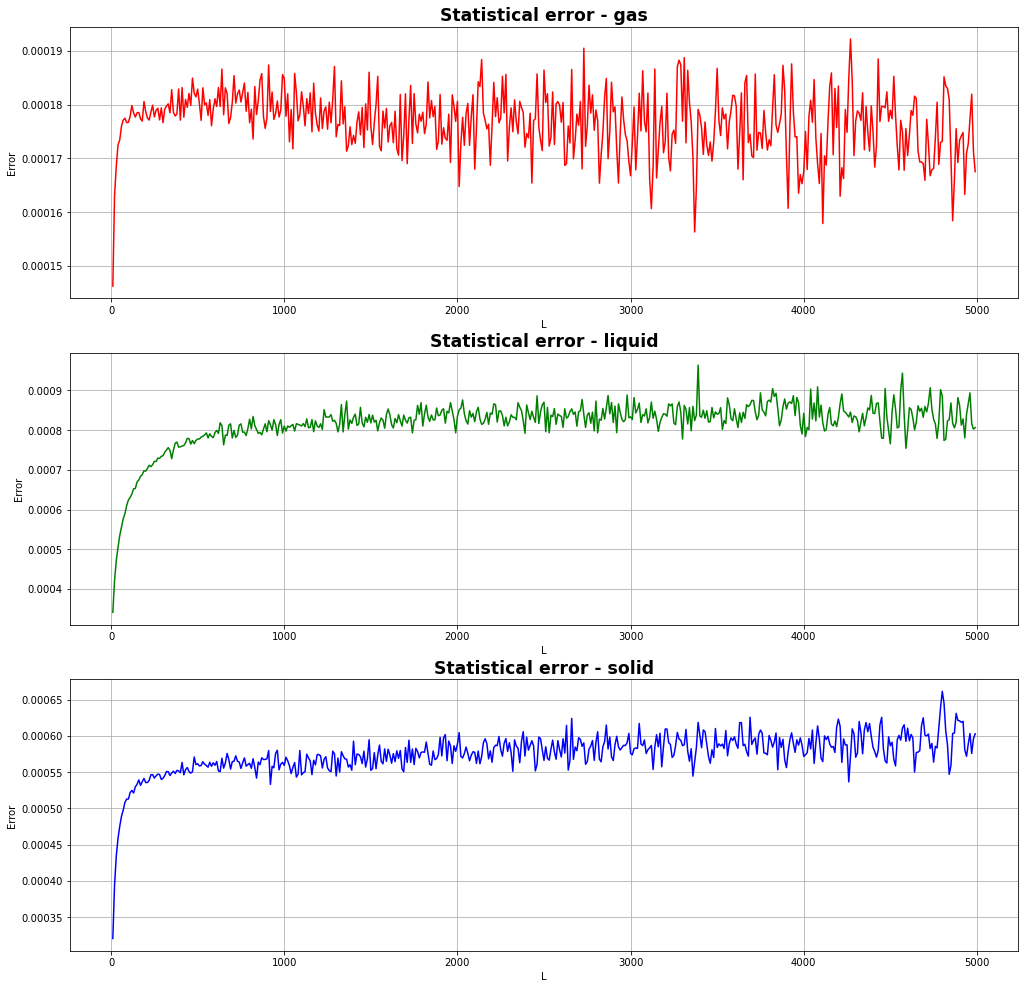

In [ ]:
# ============= functions ================= #
def Error(ave, ave2, n):
    if(n==0): 
        return 0
    return np.sqrt((ave2-ave**2)/n)

def dataBlocking(x, N, L):
    mean=0
    mean2=0
    error=0
    for n in range(N):
        mean_block=0
        for l in range(L):
            mean_block+=x[l+n*L]
        mean_block/=L
        mean=(mean*n+mean_block)/(n+1)
        mean2=(mean2*n+mean_block**2)/(n+1)
        error=Error(mean, mean2,n)
    return error
# ========================================== #

L_m=10
L_M=5000
M=500000

fig=plt.figure(figsize=(17, 17))

for i in range(0,3):
    plt.subplot(3,1,i+1)
    plt.title("Statistical error - "+phase[i], size='xx-large', weight='bold')

    y=U[i] # data loaded in 7.1
    error=[]
    x=[]

    L_range = range(10,5000, 10)

    print("\nL (of "+str(L_M)+") - "+phase[i]+": ")
    for L in L_range: 
        if L%500==0:
            print(L, end = ", ")
        N=int(M/L)
        err=dataBlocking(y,N,L)
        error.append(err)
        x.append(L)

    plt.plot(x, error, label = phase[i], color = colors[i])
        
    plt.ylabel("Error")
    plt.xlabel('L')
    #plt.xscale("log")
    plt.grid(True)
        
plt.show()

# take in coutn approx 5 minutes run

## <span id="ex-7.3">  Esercizio 7.3 - Radial Distribution Function </span>[^](#toc)

Visti i risultati della parte precedente, scelgo $50$ blocchi da $2000$ passi.

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the MD/MC code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.
Nota: occuperà una porzione di tipo 100 indici di walker[4+100]: infatti è un istogramma!

In [ ]:
# i have a file with block averages, without errors. In this script i average over them and let python compute the error as std for me ;)

cap1 = ("\n\nNote that errorbars are too small to be distinguished.\n"
      "Thit is due to the large total number of steps \n"
      "(50 blocks of 2000 step in each one)")
cap2 = ("\n\nHere errorbars are can be distinguished.\n"
      "I used 50 blks and 50 step in each.")

ng = 100
x=np.arange(0,ng)

# box scaling
rho = [0.05, 0.8, 1.1]
L = [0.0,0.0,0.0]
for i in range(3):
    L[i] = rho[i]**(-1/3)

fig=plt.figure(figsize=(15, 5))

for i in range(0,3):

    plt.subplot(1,2,1)
    gdr = np.loadtxt("ex7-MDNVE_MCNVT/MC/"+phase[i]+"/output_gdr.dat", usecols=range(0,100), unpack='true', max_rows=ng)
    y = np.mean(gdr, axis=1)
    err = np.std(gdr, axis=1)
    plt.errorbar(x*L[i], y, err, marker='', label=phase[i], color = colors[i])
    plt.title('Gdr (50blks, 2000step)', size='xx-large', weight='bold')
    plt.ylabel('Gdr')
    plt.xlabel('Distance'+cap1)
    plt.grid(True)
    plt.legend()
    plt.xlim(0,100)

    plt.subplot(1,2,2)
    gdr2 = np.loadtxt("ex7-MDNVE_MCNVT/MC50/"+phase[i]+"/output_gdr2.dat", usecols=range(0,100), unpack='true', max_rows=ng)
    y2 = np.mean(gdr2, axis=1)
    err2 = np.std(gdr2, axis=1)
    plt.errorbar(x*L[i], y, err2, marker='', label=phase[i], color = colors[i])
    plt.title('Gdr (50blks, 50step)', size='xx-large', weight='bold')
    plt.ylabel('Gdr')
    plt.xlabel('Distance '+cap2)
    plt.grid(True)
    plt.legend()
    plt.xlim(0,100)


plt.show()



## <span id="ex-7.4">  Esercizio 7.4 - Modello di Lennard-Jones </span>[^](#toc)


By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

Quindi per ciascuna delle 3 fasi devono uscire 3 grafici (U/N, p, gdr), in ciascuno dei quali devo sovrapporre i risultati di Mc e MD.

Nota: qui non abbiamo l'energia perchè metropolis non conosce le velocità!

Devo cercare di capire perchè sono discordanti :( aumentare la statistica a 100 blocchi da 1000 passi non ha migliorato significativamente la situazione.

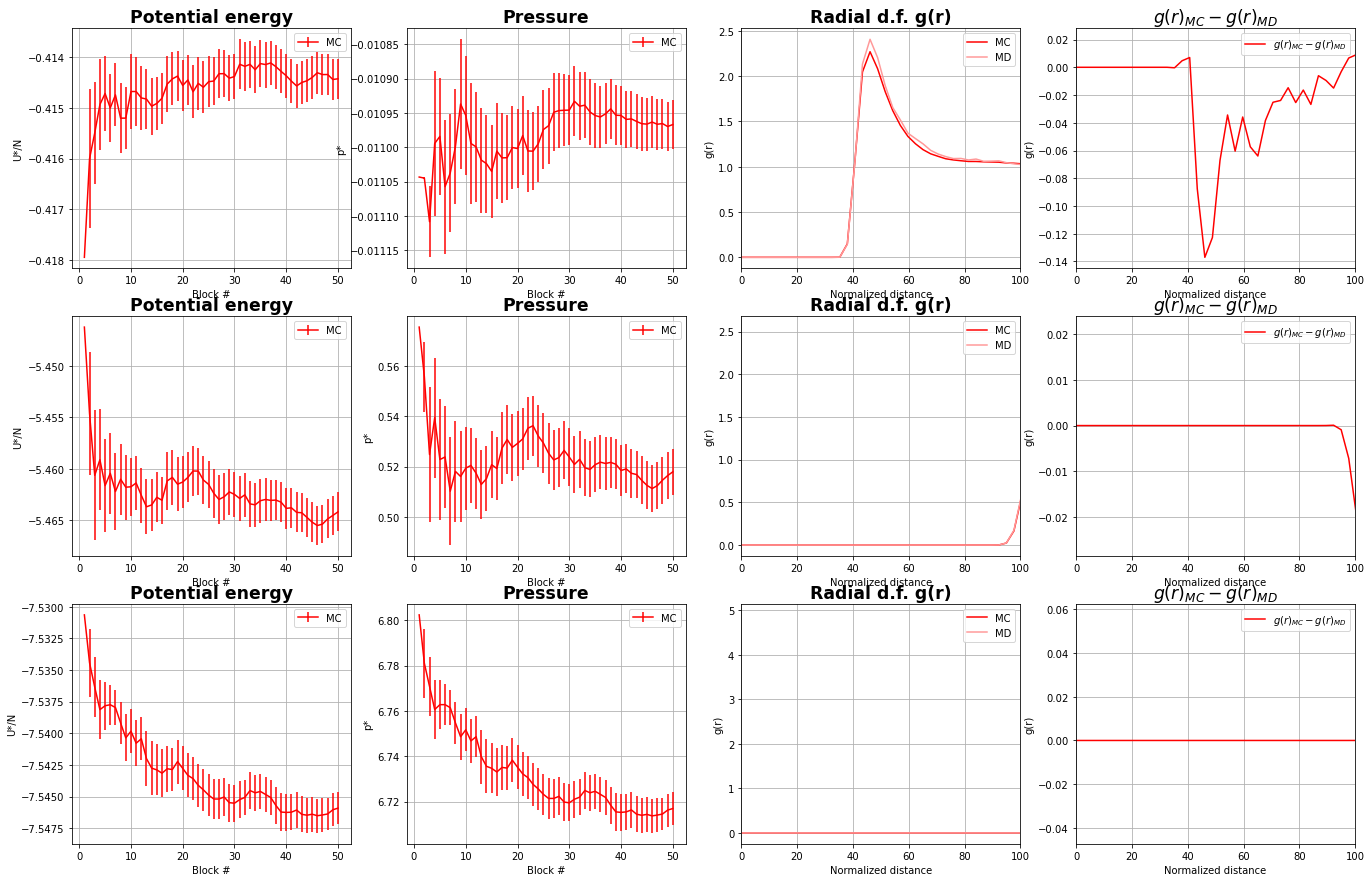

In [ ]:


# if I use 100blks, 1000step, ... should be better? the chose is due to error uncorrelation coming at ~1000 step
# default use 20blks, 5000step
# use the equilibration of ex4

algorithm = ["MC", "MD"]
colors = [["r", [1,0.6,0.6]],["g",[0.6,1,0.6]],["b",[0.6,0.6,1]]]
phase = ["gas", "liquid", "solid"]

thermod_vars = ["epot",             "pres",     "gdr",                 "gdr_diff"               ]
titles       = ["Potential energy", "Pressure", "Radial d.f. g(r)",    "$g(r)_{MC}-g(r)_{MD}$"  ] 
units        = ["U*/N",             "p*",       "g(r)",                "g(r)"                   ]
ascix        = ["Block #",          "Block #",  "Normalized distance", "Normalized distance"    ]

fig=plt.figure(figsize=(23, 15))
plot_index = 0
i = 0 # phase index
j = 0 # th_var index
k = 0 # alg index

ng = 100
x=np.arange(0,ng)

# box scaling
rho = [0.05, 0.8, 1.1]
L = [0.0,0.0,0.0]
for i in range(3):
    L[i] = rho[i]**(-1/3)
    L[i] = 1

# ciclo sulle fasi
for ph in phase:
    
    i=0
    # ciclo su U/N, p, gdr, gdr_diff
    for td_v in thermod_vars:

        plot_index +=1
        plt.subplot(3,4,plot_index)

        if td_v == "pres" or td_v == "epot":
            x, y , err= np.loadtxt("ex7-MDNVE_MCNVT/MC/"+ph+"/output_"+td_v+".dat", usecols = (0, 2, 3), delimiter = " ", unpack='true')
            # nota: columns (#blk, blk-ave, prog-ave, prog-err)
            plt.errorbar(x, y, err, marker='', label="MC", color = colors[i][0])

        if td_v == "gdr":
            # ciclo su MC/MD
            for alg in algorithm:
                gdr = np.loadtxt("ex7-MDNVE_MCNVT/"+alg+"/"+ph+"/output_"+td_v+".dat", usecols=range(0,100), unpack='true', max_rows=ng)
                y = np.mean(gdr, axis=1)
                x=np.arange(0,100)
                plt.plot(x*L[i], y, marker='', label=alg, color = colors[i][k])
                plt.xlim(0,100)
                k+=1

        if td_v == "gdr_diff":
            # ciclo su MC/MD
            gdrMC = np.loadtxt("ex7-MDNVE_MCNVT/MC/"+ph+"/output_gdr.dat", usecols=range(0,100), unpack='true', max_rows=ng)
            gdrMD = np.loadtxt("ex7-MDNVE_MCNVT/MD/"+ph+"/output_gdr.dat", usecols=range(0,100), unpack='true', max_rows=ng)
            y = np.mean(gdrMC, axis=1)-np.mean(gdrMD, axis=1)
            x=np.arange(0,100)
            plt.plot(x*L[i], y, marker='', label="$g(r)_{MC}-g(r)_{MD}$", color = colors[i][0])
            plt.xlim(0,100)

        plt.title(titles[j], size='xx-large', weight='bold')
        plt.ylabel(units[j])
        plt.xlabel(ascix[j])
        plt.grid(True)
        plt.legend()
        k=0
        j+=1
    j=0
    i+=1

txt = ("GAS\n\n\n\n\n\n\n\n\n\n\n\n"
       "LIQUID\n\n\n\n\n\n\n\n\n\n\n\n"
       "SOLID")
#fig.text(1, 0.25, txt, ha='center', weight="bold", size=20)

plt.show()


### Osservazioni

Per gli stati solido e liquido il contributo del viriale è poco significativo